In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import RandomOverSampler

In [ ]:
# Importing data for the dataset train
df_train = pd.read_csv("train_data.txt", sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'], engine='python')
print(df_train.head())
print(df_train.shape)
print(df_train.info())


   ID                               TITLE       GENRE  \
0   1       Oscar et la dame rose (2009)       drama    
1   2                       Cupid (1997)    thriller    
2   3   Young, Wild and Wonderful (1980)       adult    
3   4              The Secret Sin (1915)       drama    
4   5             The Unrecovered (2007)       drama    

                                         DESCRIPTION  
0   Listening in to a conversation between his do...  
1   A brother and sister with a past incestuous r...  
2   As the bus empties the students for their fie...  
3   To help their unemployed father make ends mee...  
4   The film's title refers not only to the un-re...  
(19166, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19166 entries, 0 to 19165
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           19166 non-null  int64 
 1   TITLE        19166 non-null  object
 2   GENRE        19166 non-null  object
 3 

In [ ]:
# Importing data for the dataset test
df_test = pd.read_csv("test_data.txt", sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'], engine='python')
print(df_test.head())
print(df_test.shape)
print(df_test.info())

   ID                          TITLE  \
0   1          Edgar's Lunch (1998)    
1   2      La guerra de papá (1977)    
2   3   Off the Beaten Track (2010)    
3   4        Meu Amigo Hindu (2015)    
4   5             Er nu zhai (1955)    

                                               GENRE  DESCRIPTION  
0   L.R. Brane loves his life - his car, his apar...          NaN  
1   Spain, March 1964: Quico is a very naughty ch...          NaN  
2   One year in the life of Albin and his family ...          NaN  
3   His father has died, he hasn't spoken with hi...          NaN  
4   Before he was known internationally as a mart...          NaN  
(19662, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19662 entries, 0 to 19661
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           19662 non-null  int64  
 1   TITLE        19662 non-null  object 
 2   GENRE        19662 non-null  object 
 3   DESCRIPTION  0 no

In [ ]:
# Importing data for the dataset train test sol
df_sol = pd.read_csv("test_data_solution.txt", sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'], engine='python')
print(df_sol.head())
print(df_sol.shape)
print(df_sol.info())

   ID                          TITLE          GENRE  \
0   1          Edgar's Lunch (1998)       thriller    
1   2      La guerra de papá (1977)         comedy    
2   3   Off the Beaten Track (2010)    documentary    
3   4        Meu Amigo Hindu (2015)          drama    
4   5             Er nu zhai (1955)          drama    

                                         DESCRIPTION  
0   L.R. Brane loves his life - his car, his apar...  
1   Spain, March 1964: Quico is a very naughty ch...  
2   One year in the life of Albin and his family ...  
3   His father has died, he hasn't spoken with hi...  
4   Before he was known internationally as a mart...  
(19302, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19302 entries, 0 to 19301
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           19302 non-null  int64 
 1   TITLE        19302 non-null  object
 2   GENRE        19302 non-null  object
 3   DESCRIPTIO

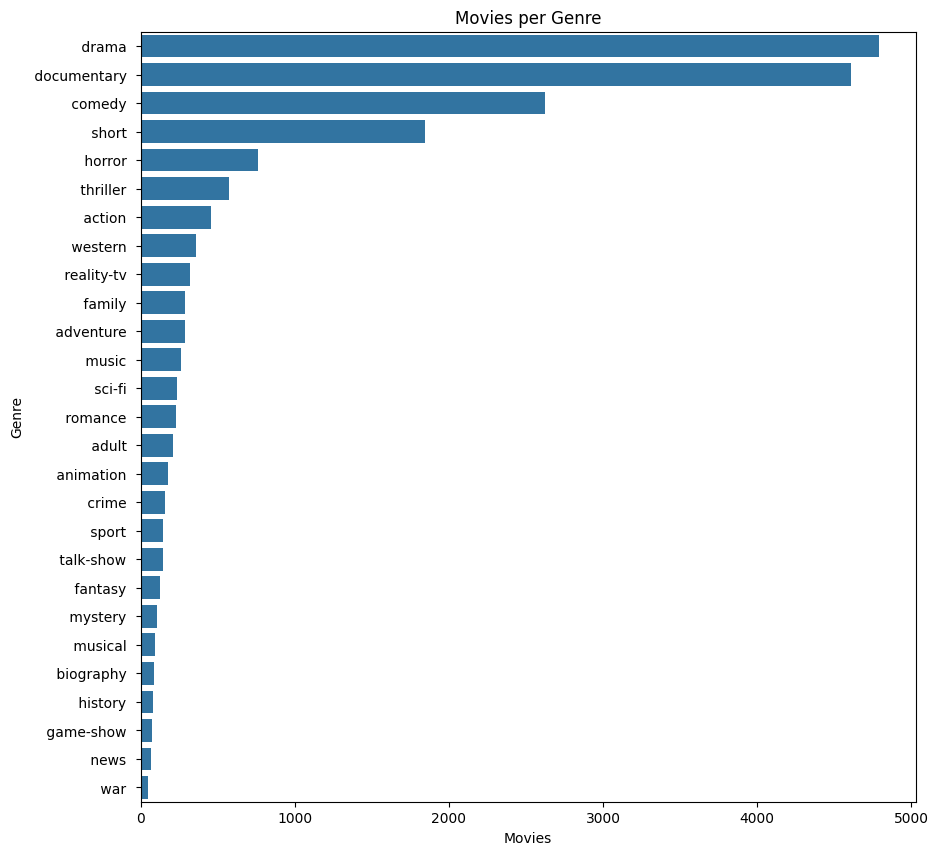

In [ ]:
# Data visualization
plt.figure(figsize=(10, 10))
sns.countplot(y=df_train['GENRE'], order=df_train['GENRE'].value_counts().index)
plt.title('Movies per Genre')
plt.xlabel('Movies')
plt.ylabel('Genre')
plt.show()

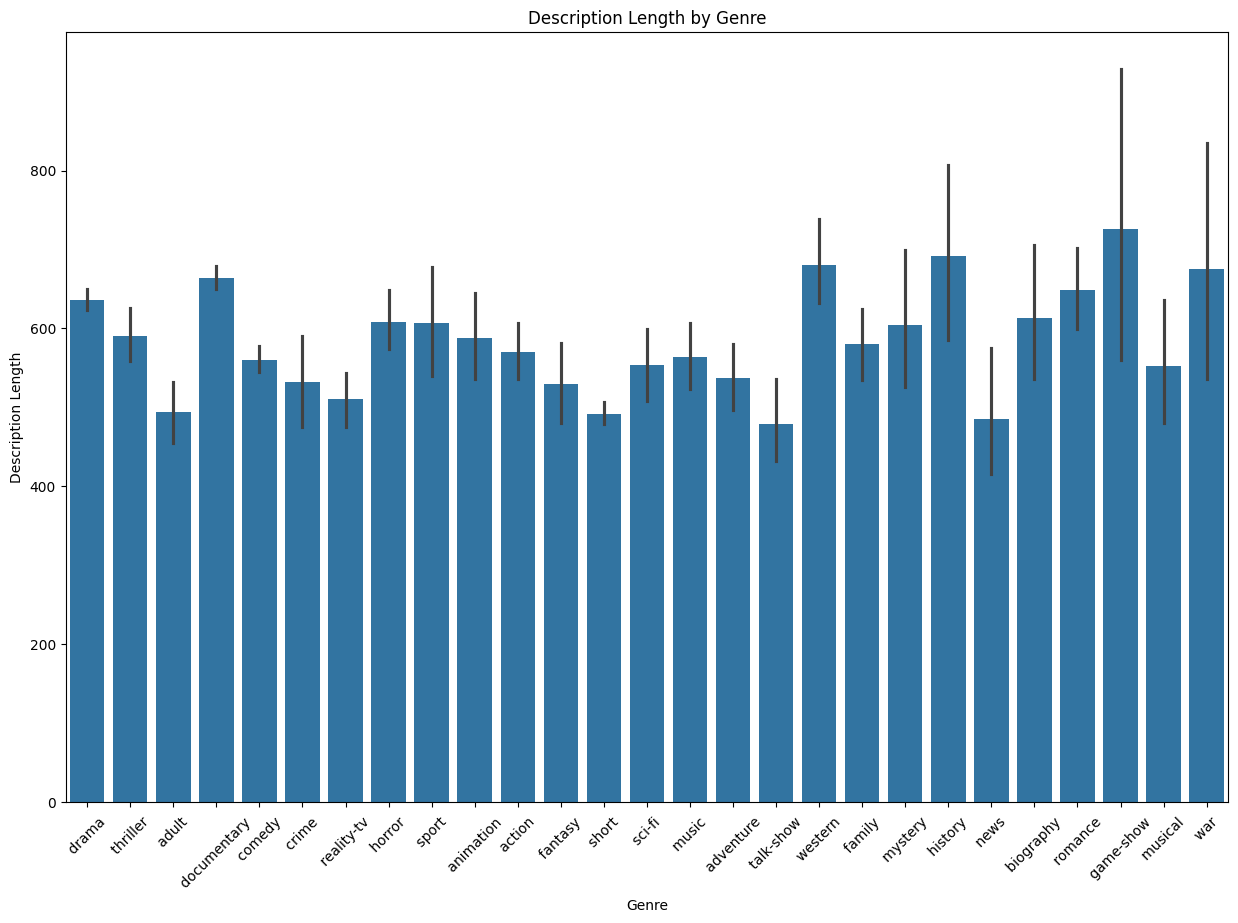

In [ ]:
df_train['DESCRIPTION_length'] = df_train['DESCRIPTION'].apply(len)
plt.figure(figsize=(15, 10))
sns.barplot(x='GENRE', y='DESCRIPTION_length', data=df_train)
plt.title('Description Length by Genre')
plt.xticks(rotation=45)
plt.xlabel('Genre')
plt.ylabel('Description Length')
plt.show()

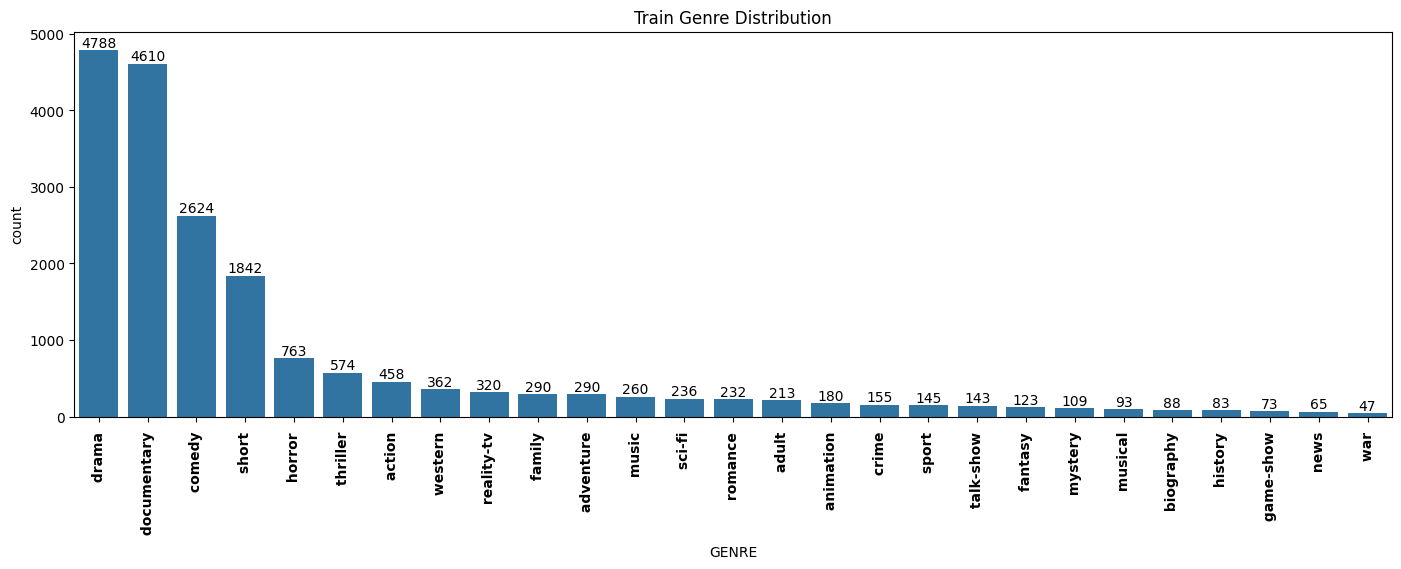

In [ ]:
plt.figure(figsize=(17, 5))
ax1 = sns.barplot(x=df_train["GENRE"].value_counts().index, y=df_train["GENRE"].value_counts())
ax1.bar_label(ax1.containers[0])
plt.title("Train Genre Distribution")
plt.xticks(rotation=90, fontweight="bold")
plt.show()

In [ ]:
top = df_train['GENRE'].value_counts().head(10)
print(top)

GENRE
 drama           4788
 documentary     4610
 comedy          2624
 short           1842
 horror           763
 thriller         574
 action           458
 western          362
 reality-tv       320
 family           290
Name: count, dtype: int64


<Axes: title={'center': 'Top 10 Most Frequent Genres'}, xlabel='Number of Movies', ylabel='Genre'>

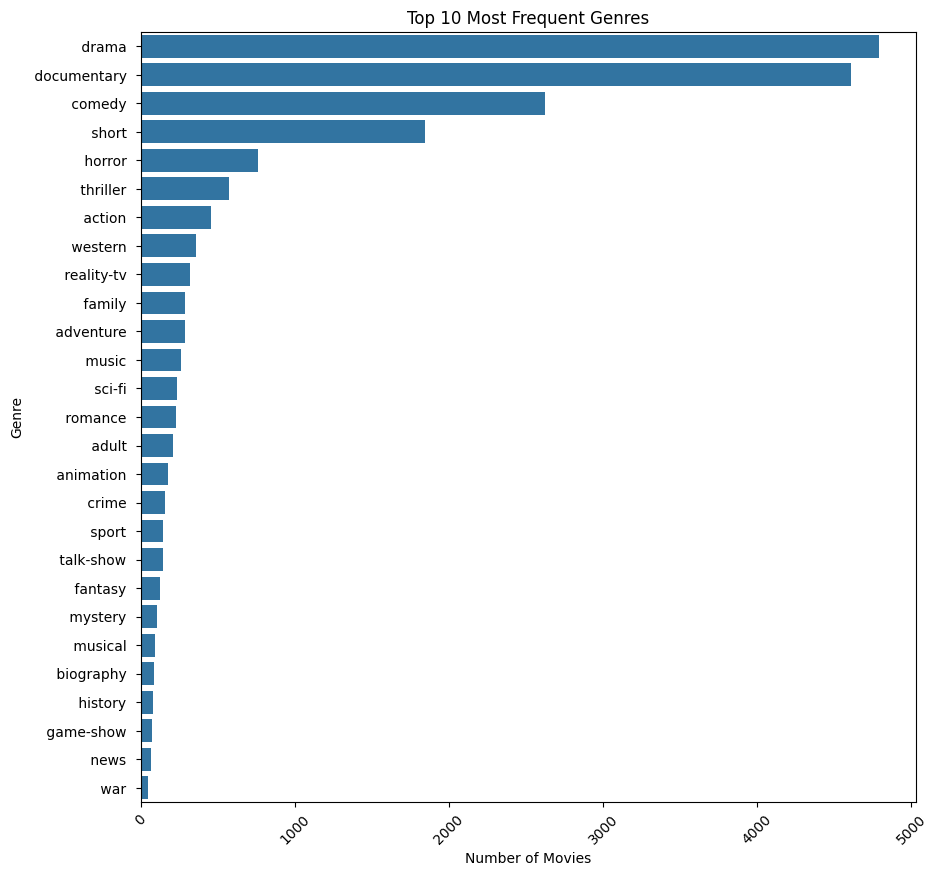

In [ ]:
plt.figure(figsize=(10, 10))
plt.title('Top 10 Most Frequent Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.xticks(rotation=45)
sns.countplot(y=df_train['GENRE'], order=df_train['GENRE'].value_counts().index)

In [ ]:
# TF-IDF vectorizing
df_train['DESCRIPTION'].fillna("", inplace=True)
df_test['DESCRIPTION'].fillna("", inplace=True)
df_sol['DESCRIPTION'].fillna("", inplace=True)

In [ ]:
tfidf = TfidfVectorizer(stop_words='english', max_features=35000)
X_train = tfidf.fit_transform(df_train['DESCRIPTION'])
X_test = tfidf.transform(df_test['DESCRIPTION'])

In [ ]:
# Label encoding
le = LabelEncoder()
y_train = le.fit_transform(df_train['GENRE'])
y_test = le.transform(df_sol['GENRE'])

In [ ]:
# Oversampling to handle class imbalance
sampler = RandomOverSampler(random_state=42)
X_train_res, y_train_res = sampler.fit_resample(X_train, y_train)

In [ ]:
# Train-validation split
X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train_res, y_train_res, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC


mnb = MultinomialNB(alpha=0.5)
gnb = GaussianNB()
bnb = BernoulliNB()
lgc = LogisticRegression(solver="sag", C=0.5, max_iter=500,
                         random_state=42, tol=0.1, n_jobs=4)
svc = LinearSVC()
rdmfr = RandomForestClassifier(n_estimators=100, random_state=42)
dcst = DecisionTreeClassifier()

In [ ]:
# Modeling
lgc = LogisticRegression(solver="sag", C=0.5, max_iter=500, random_state=42, tol=0.1, n_jobs=4)
lgc.fit(X_train_sub, y_train_sub)

LogisticRegression(C=0.5, max_iter=500, n_jobs=4, random_state=42, solver='sag',
                   tol=0.1)

In [ ]:
# Validation Evaluation
y_val_pred = lgc.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Validation Classification Report:\n", classification_report(y_val, y_val_pred))

Validation Accuracy: 0.9405167079207921
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95       919
           1       0.97      1.00      0.99       956
           2       0.97      0.99      0.98      1008
           3       0.99      1.00      0.99       959
           4       1.00      1.00      1.00       994
           5       0.80      0.69      0.74       990
           6       0.98      1.00      0.99       941
           7       0.75      0.70      0.73       964
           8       0.68      0.51      0.58       986
           9       0.94      0.99      0.97       936
          10       0.99      1.00      1.00       943
          11       1.00      1.00      1.00       941
          12       0.99      1.00      1.00       978
          13       0.93      0.96      0.95       963
          14       0.94      1.00      0.97       970
          15       0.99      1.00      1.00       964
      

In [ ]:
# Modeling and Evaluation for Multinomial Naive Bayes
mnb = MultinomialNB(alpha=0.5)
mnb.fit(X_train_sub, y_train_sub)

# Validation Evaluation for Multinomial Naive Bayes
y_val_pred_mnb = mnb.predict(X_val)
print("Multinomial Naive Bayes Validation Accuracy:", accuracy_score(y_val, y_val_pred_mnb))
print("Multinomial Naive Bayes Validation Classification Report:\n", classification_report(y_val, y_val_pred_mnb))

Multinomial Naive Bayes Validation Accuracy: 0.9438041460396039
Multinomial Naive Bayes Validation Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       919
           1       0.97      1.00      0.98       956
           2       0.98      0.99      0.99      1008
           3       0.98      1.00      0.99       959
           4       0.99      1.00      1.00       994
           5       0.85      0.71      0.77       990
           6       0.98      1.00      0.99       941
           7       0.76      0.71      0.73       964
           8       0.70      0.54      0.61       986
           9       0.96      1.00      0.98       936
          10       0.99      1.00      0.99       943
          11       1.00      1.00      1.00       941
          12       0.99      1.00      1.00       978
          13       0.90      0.98      0.94       963
          14       0.93      0.99      0.96       970
          15

In [ ]:
# Modeling and Evaluation for Linear SVC
svc = LinearSVC()
svc.fit(X_train_sub, y_train_sub)

# Validation Evaluation for Linear SVC
y_val_pred_svc = svc.predict(X_val)
print("Linear SVC Validation Accuracy:", accuracy_score(y_val, y_val_pred_svc))
print("Linear SVC Validation Classification Report:\n", classification_report(y_val, y_val_pred_svc))

Linear SVC Validation Accuracy: 0.9645730198019802
Linear SVC Validation Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       919
           1       0.98      1.00      0.99       956
           2       0.99      1.00      0.99      1008
           3       0.99      1.00      1.00       959
           4       1.00      1.00      1.00       994
           5       0.83      0.85      0.84       990
           6       1.00      1.00      1.00       941
           7       0.83      0.75      0.79       964
           8       0.78      0.57      0.66       986
           9       0.98      1.00      0.99       936
          10       0.99      1.00      1.00       943
          11       1.00      1.00      1.00       941
          12       1.00      1.00      1.00       978
          13       0.97      1.00      0.98       963
          14       0.98      1.00      0.99       970
          15       0.99      1.00     

In [ ]:
# Function to predict movie genre
def predict_movie(description):
    tfidf_desc = tfidf.transform([description])
    pred_label = lgc.predict(tfidf_desc)
    return le.inverse_transform(pred_label)[0]

sample_descr_for_movie = "A movie where police chase the criminal and shoot him"
print(predict_movie(sample_descr_for_movie))

sample_descr_for_movie1 = "A movie where a person chases a girl to marry her but she refuses him."
print(predict_movie(sample_descr_for_movie1))

 action 
 comedy 
